**INTRODUCTION**

In this notebook I'm going to implement some exploratory data analysis using some visualization tools  on the given data frame, the main library that will be used are pandas, numpy, seaborn and matplotlib.pyplot.

Trough visualization tools we can gain some essential information on the given data sets, understanding the distribution of the data could help to choose wich model is best suited to solve a particular problem.

In [8]:

import pandas as pd 
import numpy as np

data= pd.read_csv('data_cancer.csv')

data.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [93]:
data = pd.get_dummies(data)




,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_F,GENDER_M,LUNG_CANCER_NO,LUNG_CANCER_YES
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1,1,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1,0,0,1
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,0,1,0,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,0,1,0,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,0,1,0,1


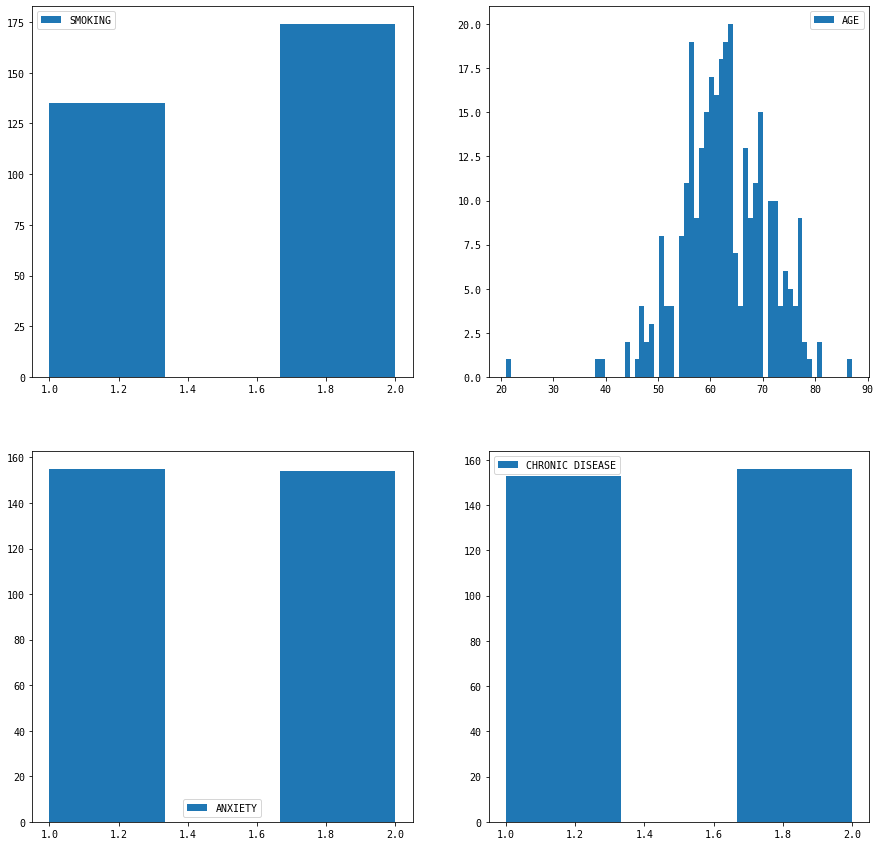

In [95]:
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(15, 15))


fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2,2,4)


ax1.hist(data['SMOKING'],bins=3, label= 'SMOKING')
ax2.hist(data['AGE'],bins=70, label='AGE')
ax3.hist(data['ANXIETY'],bins=3, label='ANXIETY')
ax4.hist(data['CHRONIC DISEASE'], bins=3, label='CHRONIC DISEASE')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

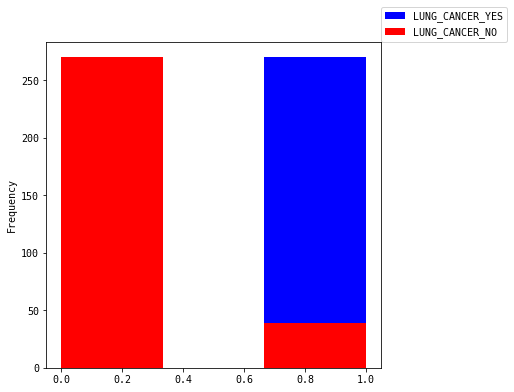

In [105]:
plt.rc('figure', figsize=(6, 6))
data['LUNG_CANCER_YES'].plot.hist(bins=3, color='b')
data['LUNG_CANCER_NO'].plot.hist(bins=3, color='r')
plt.legend(loc=(1,1))

We can see from the plot generated that inside the data set the majority of people have an age between 40 and 80. Furthermore, for the variables smoking, axiety and chronic disease the data set has almost the same number of positive and negative data points; this is true even for the lung_cancer variable.
This are important insight for applying, eventualy, some model to predict lung cancer from this data set. Sometime data sets can have biased observation that could influence negatively the performance of the predictive model.

**MULTICATEGORICAL PLOTS**

[Text(0.5, 1.0, 'SMOKING STATUTS RELATED TO GENDER AND SHORTNESS OF BREATH')]

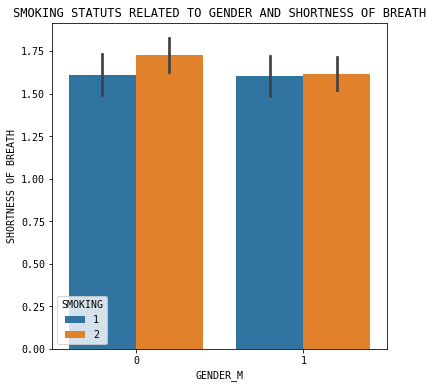

In [147]:
import seaborn as sns

sns.barplot(x = 'GENDER_M', y= 'SHORTNESS OF BREATH',hue="SMOKING", data=data, orient='v').set(title='SMOKING STATUTS RELATED TO GENDER AND SHORTNESS OF BREATH')


[Text(0.5, 1.0, 'LUNG CANCER RELATED TO GENDER AND CONCOMITANCE OF CHRONIC DISEASE')]

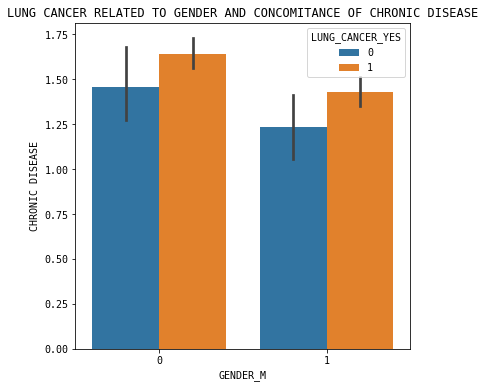

In [145]:
sns.barplot(x = 'GENDER_M', y= 'CHRONIC DISEASE',hue="LUNG_CANCER_YES", data=data, orient='v').set(title='LUNG CANCER RELATED TO GENDER AND CONCOMITANCE OF CHRONIC DISEASE')


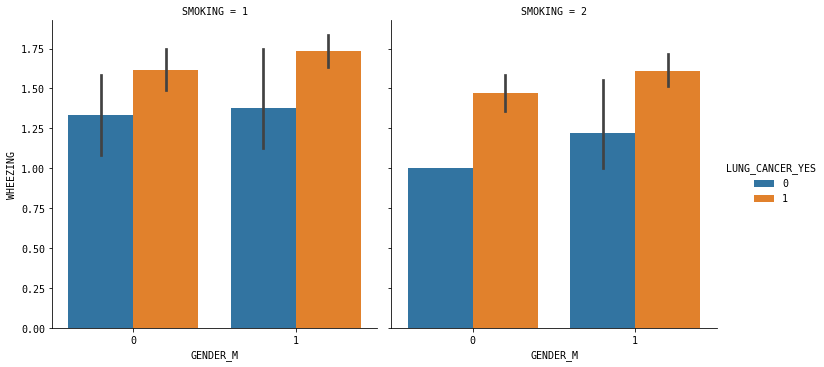

In [143]:
sns.catplot(x='GENDER_M', y='WHEEZING', hue='LUNG_CANCER_YES', col='SMOKING', kind='bar', data=data)

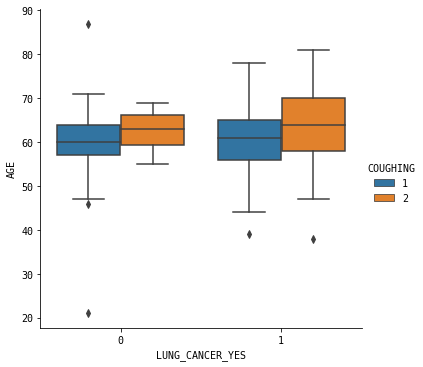

In [157]:
sns.catplot(x='LUNG_CANCER_YES', y='AGE', hue='COUGHING', kind='box', data=data)